### ** Establishing Pandas Dataframes **

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('baseball_reference_2016_clean.csv', index_col = 0)

changing data types

In [3]:
df['attendance'] = df['attendance'].astype(float)
df['date'] = pd.to_datetime(df['date'])
df['temperature'] = df['temperature'].astype(float)
df['wind_speed'] = df['wind_speed'].astype(float)

create a dataframe for regular season games

In [4]:
reg_season = df[df['season'] == 'regular season']

create a dataframe for regular season wins

In [5]:
reg_wins = pd.DataFrame(reg_season[reg_season['home_team_runs'] > 
                                   reg_season['away_team_runs']]['home_team'].value_counts() + 
                        reg_season[reg_season['home_team_runs'] < 
                                   reg_season['away_team_runs']]['away_team'].value_counts())
reg_wins.set_axis(['wins'], axis = 'columns', inplace = True)
reg_wins.index.name = 'team'

create a dataframe for regular season home wins

In [6]:
reg_home_wins = pd.DataFrame(reg_season[reg_season['home_team_runs'] > 
                                        reg_season['away_team_runs']]['home_team'].value_counts())
reg_home_wins.set_axis(['home_wins'], axis = 'columns', inplace = True)
reg_home_wins.index.name = 'team'

create a dataframe for regular season losses

In [7]:
reg_losses = pd.DataFrame(reg_season[reg_season['home_team_runs'] < 
                                     reg_season['away_team_runs']]['home_team'].value_counts() + 
                          reg_season[reg_season['home_team_runs'] > 
                                     reg_season['away_team_runs']]['away_team'].value_counts())
reg_losses.set_axis(['losses'], axis = 'columns', inplace = True)
reg_losses.index.name = 'team'

create a dataframe for regular season home losses

In [8]:
reg_home_losses = pd.DataFrame(reg_season[reg_season['home_team_runs'] < 
                                          reg_season['away_team_runs']]['home_team'].value_counts())
reg_home_losses.set_axis(['home_losses'], axis = 'columns', inplace = True)
reg_home_losses.index.name = 'team'

create a dataframe for regular season win percentages

In [9]:
win_percentage = reg_wins.wins/(reg_wins.wins + reg_losses.losses)
home_win_percentage = reg_home_wins.home_wins / \
(reg_home_wins.home_wins + reg_home_losses.home_losses)
away_win_percentage = (reg_wins.wins - reg_home_wins.home_wins) / \
((reg_wins.wins - reg_home_wins.home_wins) + 
 (reg_losses.losses - reg_home_losses.home_losses))
outcomes = [reg_wins, reg_home_wins, reg_losses, reg_home_losses, 
            win_percentage, home_win_percentage, away_win_percentage]

reg_win_percentage = pd.concat(outcomes, axis = 1, join = 'outer')
reg_win_percentage.index.name = 'team'
reg_win_percentage = reg_win_percentage.rename \
(columns={0: 'win_percentage', 1: 'home_win_percentage', 
          2: 'away_win_percentage'})
reg_win_percentage.drop(['wins', 'home_wins', 
                         'losses', 'home_losses'], 
                        axis = 1, inplace = True)
reg_win_percentage = reg_win_percentage.round(2)
reg_win_percentage.head()

,win_percentage,home_win_percentage,away_win_percentage
team,,,
Arizona Diamondbacks,0.43,0.41,0.44
Atlanta Braves,0.42,0.38,0.46
Baltimore Orioles,0.55,0.62,0.48
Boston Red Sox,0.57,0.58,0.57
Chicago Cubs,0.64,0.70,0.57


In [10]:
aggregations = {
    'venue': 'count',
    'home_team_win': 'sum',
    'home_team_loss': 'sum',
    'attendance': 'mean',
    'temperature': 'mean',
    'wind_speed': 'mean',
    'game_hours_dec': 'mean'
    }

create a dataframe grouping by regular season game types

In [11]:
by_game_type = df[df['season'] == 'regular season'] \
.groupby(['home_team', 'venue', 'game_type']).agg(aggregations)
by_game_type = by_game_type.rename(columns={'venue': 'games_played'})
by_game_type['home_win_percentage'] = by_game_type['home_team_win'] / \
(by_game_type['home_team_win'] + by_game_type['home_team_loss'])
by_game_type.drop(['home_team_win', 'home_team_loss'], 
                  axis = 1, inplace = True)
# removing any venue that did not have at least 80 games played.
# only instance is single Braves game played at Fort Bragg Park.
by_game_type = by_game_type[0:2].append(by_game_type[3:])
by_game_type = by_game_type.round(2)
by_game_type = by_game_type.reset_index()
by_game_type.head()

,home_team,venue,game_type,games_played,attendance,temperature,wind_speed,game_hours_dec,home_win_percentage
0,Arizona Diamondbacks,Chase Field,Day Game,21,24083.76,75.29,0.48,3.27,0.33
1,Arizona Diamondbacks,Chase Field,Night Game,60,25507.62,83.10,3.17,3.29,0.43
2,Atlanta Braves,Turner Field,Day Game,21,28478.86,82.67,7.71,3.09,0.57
3,Atlanta Braves,Turner Field,Night Game,59,23902.98,80.83,8.66,3.25,0.32
4,Baltimore Orioles,Oriole Park at Camden Yards,Day Game,19,33935.68,72.74,5.32,3.06,0.68


create a dataframe grouping by regular season sky conditions

In [12]:
by_sky = df[df['season'] == 'regular season'] \
.groupby(['home_team', 'venue', 'sky']).agg(aggregations)
by_sky = by_sky.rename(columns={'venue': 'games_played'})
by_sky['home_win_percentage'] = by_sky['home_team_win'] / \
(by_sky['home_team_win'] + by_sky['home_team_loss'])
by_sky.drop(['home_team_win', 'home_team_loss'], 
            axis = 1, inplace = True)
# removing any venue that did not have at least 80 games played.
# only instance is single Braves game played at Fort Bragg Park.
by_sky = by_sky[0:4].append(by_sky[5:])
by_sky = by_sky.round(2)
by_sky = by_sky.reset_index()
by_sky.head()

,home_team,venue,sky,games_played,attendance,temperature,wind_speed,game_hours_dec,home_win_percentage
0,Arizona Diamondbacks,Chase Field,Cloudy,5,31102.00,84.60,9.40,3.48,0.40
1,Arizona Diamondbacks,Chase Field,In Dome,57,24816.07,77.21,0.00,3.28,0.39
2,Arizona Diamondbacks,Chase Field,Sunny,18,24111.39,92.28,8.17,3.28,0.50
3,Arizona Diamondbacks,Chase Field,Unknown,1,32185.00,82.00,6.00,2.77,0.00
4,Atlanta Braves,Turner Field,Cloudy,48,24966.79,83.27,8.38,3.19,0.40


create a dataframe grouping by regular season wind directions

In [13]:
by_wind_direction = df[df['season'] == 'regular season']  \
.groupby(['home_team', 'venue', 'wind_direction']).agg(aggregations)
by_wind_direction = by_wind_direction.rename(columns={'venue': 'games_played'})
by_wind_direction['home_win_percentage'] = by_wind_direction['home_team_win'] / \
(by_wind_direction['home_team_win'] + by_wind_direction['home_team_loss'])
by_wind_direction.drop(['home_team_win', 'home_team_loss'], 
                       axis = 1, inplace = True)
# removing any venue that did not have at least 80 games played.
# only instance is single Braves game played at Fort Bragg Park.
by_wind_direction = by_wind_direction[0:7].append(by_wind_direction[8:])
by_wind_direction = by_wind_direction.round(2)
by_wind_direction = by_wind_direction.reset_index()
by_wind_direction.head()

,home_team,venue,wind_direction,games_played,attendance,temperature,wind_speed,game_hours_dec,home_win_percentage
0,Arizona Diamondbacks,Chase Field,from Left to Right,1,24935.00,92.00,9.00,3.32,0.00
1,Arizona Diamondbacks,Chase Field,in from Centerfield,3,20445.00,93.33,8.67,3.66,1.00
2,Arizona Diamondbacks,Chase Field,in from Leftfield,4,26720.50,94.75,8.50,3.78,0.25
3,Arizona Diamondbacks,Chase Field,in unknown direction,65,25092.98,78.68,1.20,3.24,0.38
4,Arizona Diamondbacks,Chase Field,out to Centerfield,2,25526.50,95.50,7.50,3.00,1.00


create a dataframe grouping by regular season games played at each venue

In [14]:
by_venue = df[df['season'] == 'regular season'] \
.groupby(['home_team', 'venue']).agg(aggregations)
by_venue = by_venue.rename(columns={'venue': 'games_played'})
by_venue['home_win_percentage'] = by_venue['home_team_win'] / \
(by_venue['home_team_win'] + by_venue['home_team_loss'])
by_venue.drop(['home_team_win', 'home_team_loss'], 
              axis = 1, inplace = True)
# removing any venue that did not have at least 80 games played.
# only instance is single Braves game played at Fort Bragg Park.
by_venue = by_venue[0:1].append(by_venue[2:])
by_venue = by_venue.round(2)
by_venue = by_venue.reset_index()
by_venue['home_team'] = by_venue['home_team'].astype(str)
by_venue['venue'] = by_venue['venue'].astype(str)
by_venue.head()

,home_team,venue,games_played,attendance,temperature,wind_speed,game_hours_dec,home_win_percentage
0,Arizona Diamondbacks,Chase Field,81,25138.47,81.07,2.47,3.28,0.41
1,Atlanta Braves,Turner Field,80,25104.15,81.31,8.41,3.21,0.39
2,Baltimore Orioles,Oriole Park at Camden Yards,81,26819.06,74.04,5.06,2.98,0.62
3,Boston Red Sox,Fenway Park,81,36486.84,69.93,12.20,3.27,0.58
4,Chicago Cubs,Wrigley Field,81,39906.42,69.90,8.72,3.06,0.70


### ** Visualizations with Seaborn **

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

** Dataframe Correlations **

What variables have a correlation above 0.25?

In [16]:
# only game variables (errors, hits, runs, wins, losses, and hours) have correlations above 0.25
df.corr()[(abs(df.corr() >= .25)) & (df.corr() != 1)]

,attendance,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs,temperature,wind_speed,total_runs,game_hours_dec,home_team_win,home_team_loss
attendance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_errors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_hits,NaN,NaN,NaN,0.780760,NaN,NaN,NaN,NaN,NaN,0.577550,0.461063,NaN,0.438073
away_team_runs,NaN,NaN,0.780760,NaN,0.280002,NaN,NaN,NaN,NaN,0.720009,0.381505,NaN,0.568683
home_team_errors,NaN,NaN,NaN,0.280002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_team_hits,NaN,NaN,NaN,NaN,NaN,NaN,0.769776,NaN,NaN,0.598080,0.341406,0.376889,NaN
home_team_runs,NaN,NaN,NaN,NaN,NaN,0.769776,NaN,NaN,NaN,0.721514,NaN,0.537674,NaN
temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wind_speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_runs,NaN,NaN,0.577550,0.720009,NaN,0.598080,0.721514,NaN,NaN,NaN,0.409457,NaN,NaN


What variables have a correlation above 0.25?

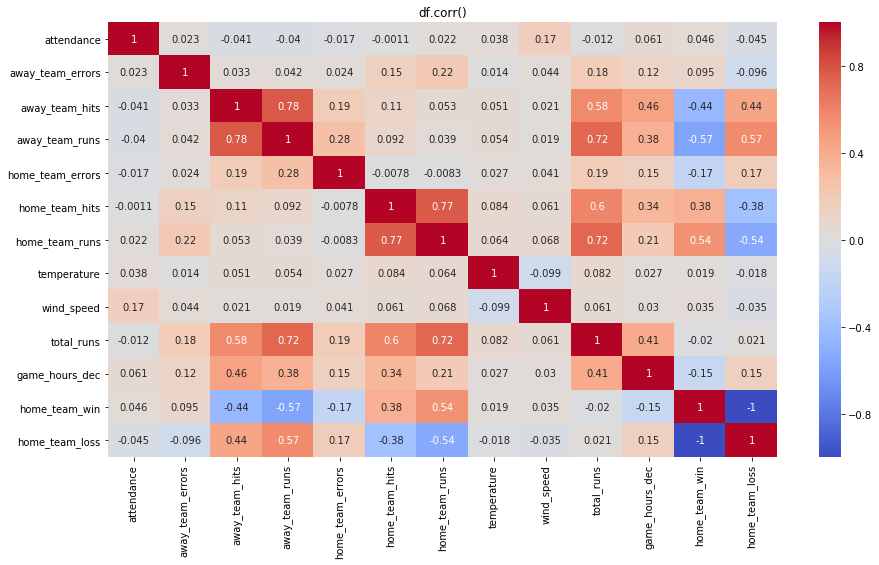

In [17]:
# only game variables (errors, hits, runs, wins, losses, and hours) have correlations above 0.25
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.title('df.corr()');

Are there any correlations between our discrete game variables and our discrete weather variables?

In [18]:
pairplot_numbers = df.copy()
pairplot_numbers.drop(['away_team_errors', 'home_team_errors', 
                       'away_team_hits', 'home_team_hits', 
                       'home_team_win', 'home_team_loss', 
                       'total_runs'], 
                      axis = 1, inplace = True)
pairplot_numbers['attendance'] = pairplot_numbers['attendance'].fillna(0)

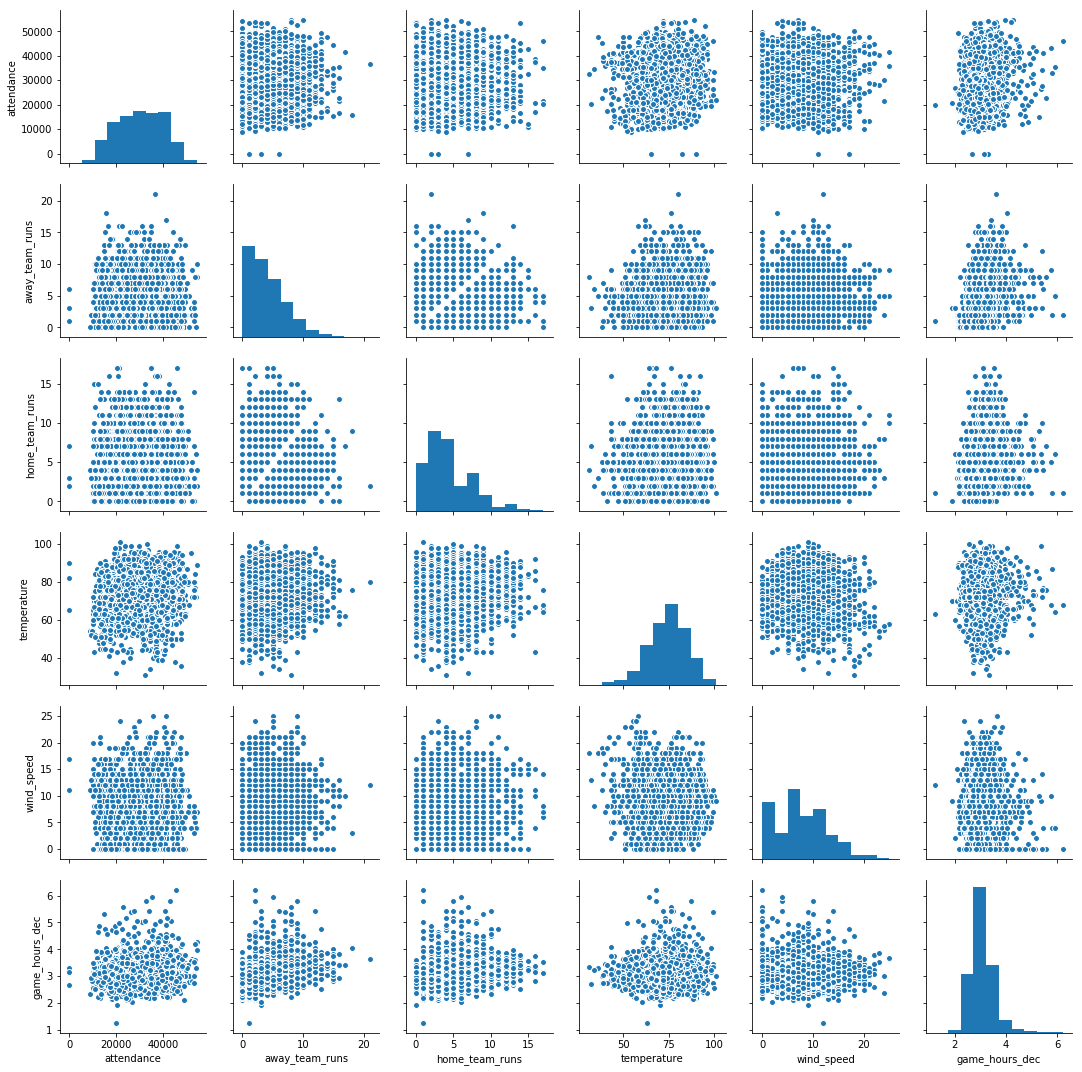

In [19]:
ax = sns.pairplot(pairplot_numbers)

** Sky Condition **

How does the distribution of home team win percentage vary according to sky condition?

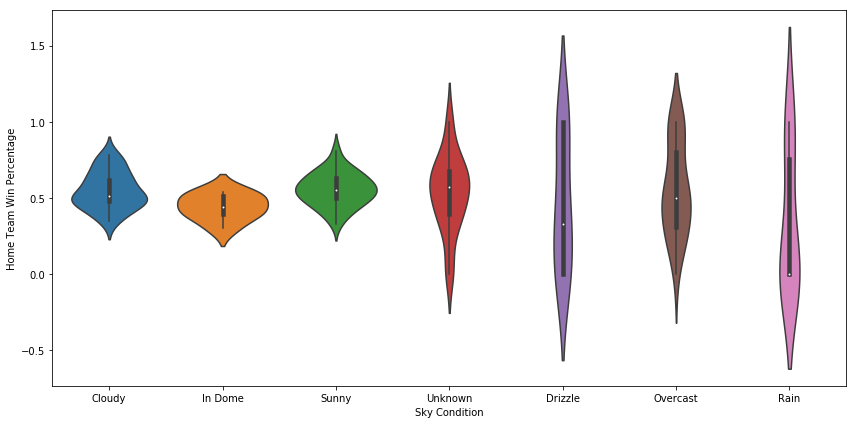

In [20]:
plt.figure(figsize = (12, 6))

ax = sns.violinplot(x = by_sky['sky'], 
                    y = by_sky['home_win_percentage'], 
                    data = by_sky)
ax.set_xlabel('Sky Condition')
ax.set_ylabel('Home Team Win Percentage')

plt.tight_layout()

How does the distribution of total runs scored vary according to sky condition?

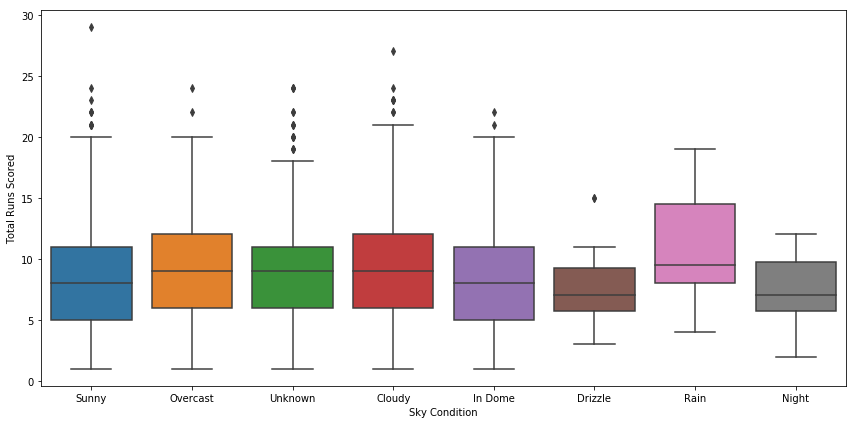

In [21]:
plt.figure(figsize = (12, 6))

ax = sns.boxplot(x = df['sky'], 
                 y = df['total_runs'], data = df)
ax.set_xlabel('Sky Condition')
ax.set_ylabel('Total Runs Scored')

plt.tight_layout()

How does the distribution of home team win percentage vary according to sky condition?

Does the game type play a role?

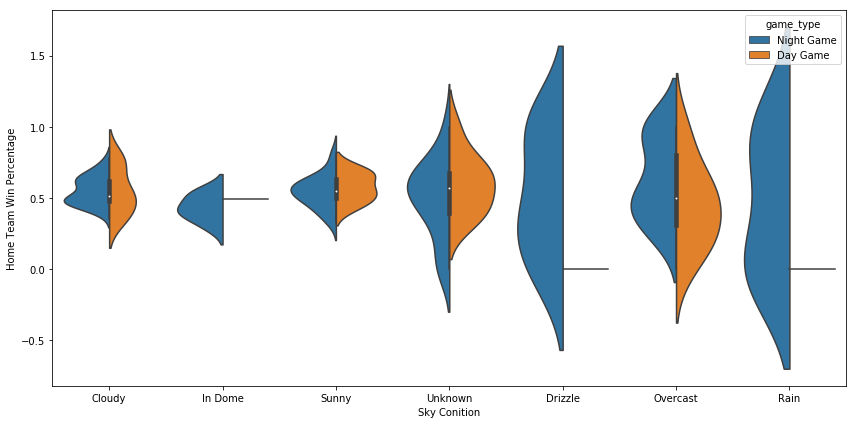

In [22]:
plt.figure(figsize = (12, 6))

ax = sns.violinplot(x = by_sky['sky'], 
                    y = by_sky['home_win_percentage'], 
                    hue = 'game_type', data = df, split = True)
ax.set_xlabel('Sky Conition')
ax.set_ylabel('Home Team Win Percentage')

plt.tight_layout()

How do home team wins and losses vary according to the sky condition?

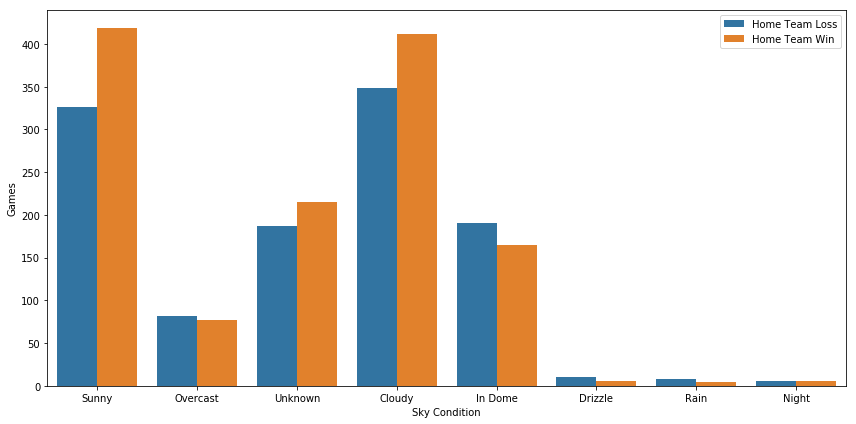

In [23]:
plt.figure(figsize = (12, 6))

ax = sns.countplot(x = df['sky'], 
                   hue = df['home_team_win'], data = df)
ax.set_xlabel('Sky Condition')
ax.set_ylabel('Games')
ax.legend(['Home Team Loss', 'Home Team Win'])

plt.tight_layout()

** Wind Direction **

How does the distribution of home team win percentage vary according to wind direction?

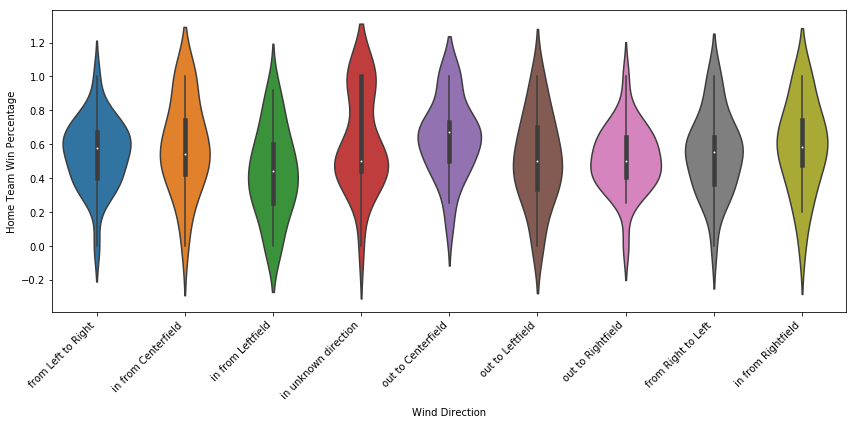

In [24]:
plt.figure(figsize = (12, 6))

ax = sns.violinplot(x = by_wind_direction['wind_direction'], 
                    y = by_wind_direction['home_win_percentage'], 
                    data = by_wind_direction)
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Home Team Win Percentage')
ax.set_xticklabels(by_wind_direction['wind_direction'].unique(), 
                   rotation = 45, ha = "right")

plt.tight_layout()

How does the distribution of home team win percentage vary according to wind direction?

Does the game type play a role?

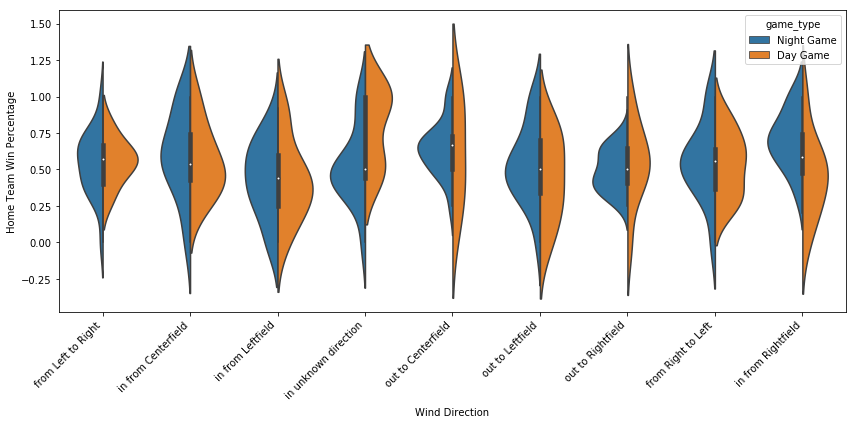

In [25]:
plt.figure(figsize = (12, 6))

ax = sns.violinplot(x = by_wind_direction['wind_direction'], 
                    y = by_wind_direction['home_win_percentage'],
                    hue = 'game_type', data = df, split = True)
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Home Team Win Percentage')
ax.set_xticklabels(by_wind_direction['wind_direction'].unique(), 
                   rotation = 45, ha = "right")

plt.tight_layout()

How does the distribution of total runs scored vary according to wind direction?

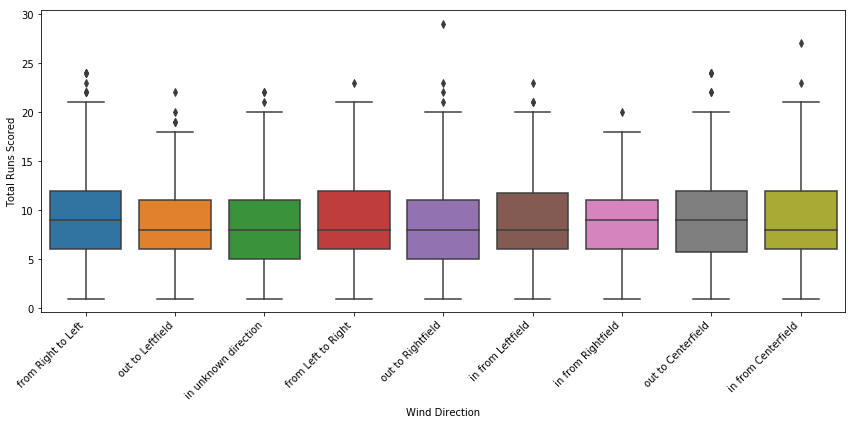

In [26]:
plt.figure(figsize = (12, 6))

ax = sns.boxplot(x = df['wind_direction'], 
                 y = df['total_runs'], 
                 data = df)
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Total Runs Scored')
ax.set_xticklabels(df['wind_direction'].unique(), 
                   rotation = 45, ha = "right")

plt.tight_layout()

How does the distribution of total runs scored vary according to wind direction?

Does the game type play a role?

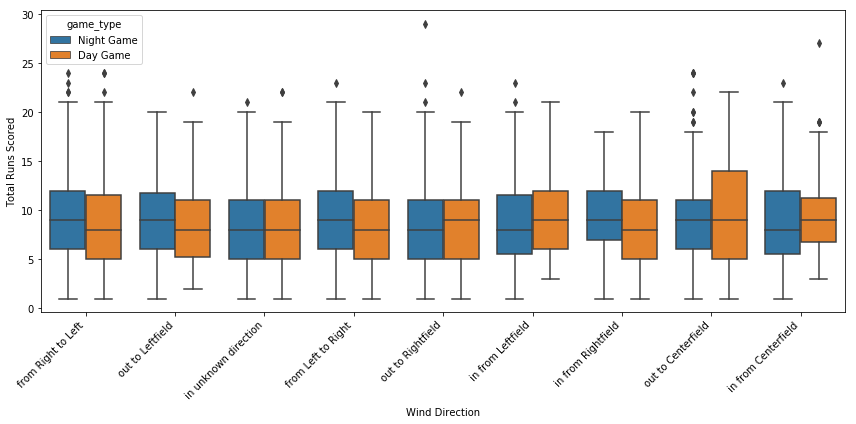

In [27]:
plt.figure(figsize = (12, 6))

ax = sns.boxplot(x = df['wind_direction'], 
                 y = df['total_runs'], 
                 hue = 'game_type', data = df)
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Total Runs Scored')
ax.set_xticklabels(df['wind_direction'].unique(), 
                   rotation = 45, ha = "right")

plt.tight_layout()

How does the distribution of total runs scored vary according to wind direction?

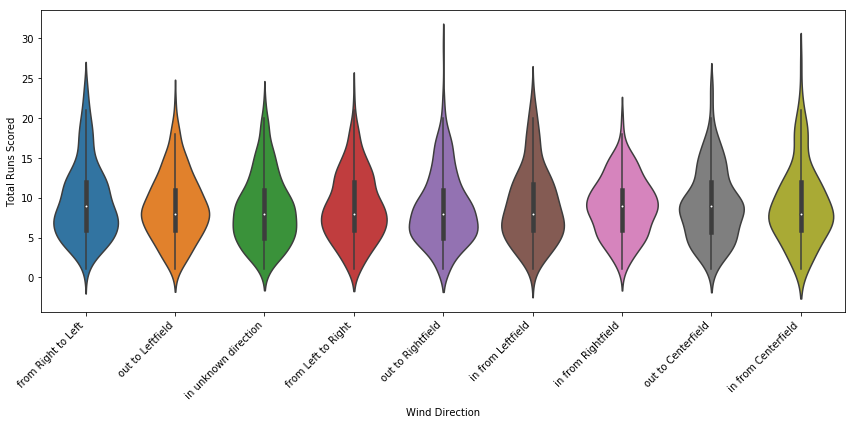

In [28]:
plt.figure(figsize = (12, 6))

ax = sns.violinplot(x = df['wind_direction'], 
                    y = df['total_runs'], 
                    data = df)
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Total Runs Scored')
ax.set_xticklabels(df['wind_direction'].unique(), 
                   rotation = 45, ha = "right")

plt.tight_layout()

How do home team wins and losses vary according to wind direction?

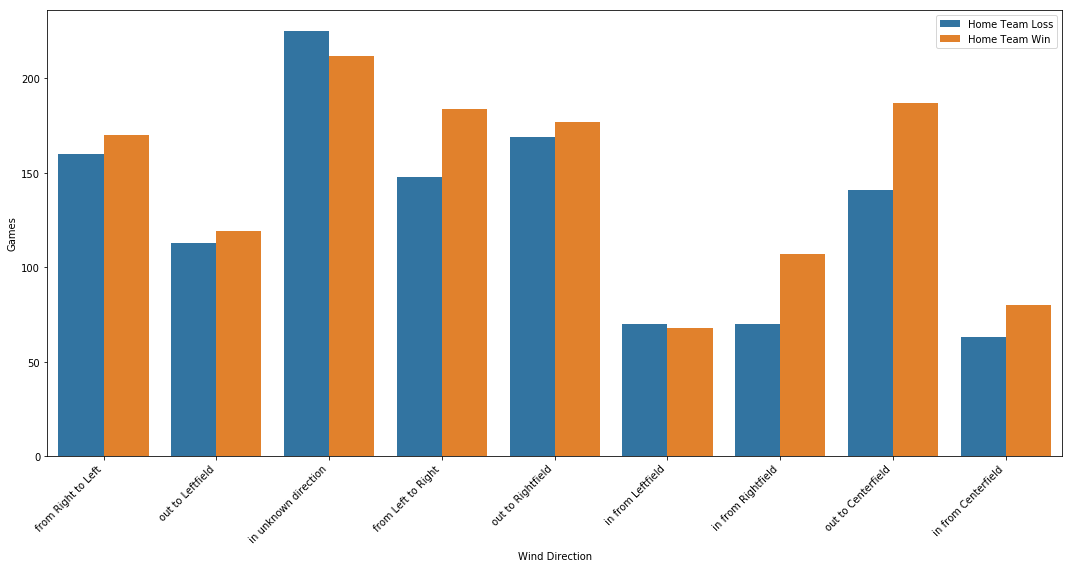

In [29]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(x = df['wind_direction'], 
                   hue = df['home_team_win'], data = df)
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Games')
ax.set_xticklabels(df['wind_direction'].unique(), 
                   rotation = 45, ha = "right")
ax.legend(['Home Team Loss', 'Home Team Win'])

plt.tight_layout()

** Wind Speed **

Is there a linear relationship between wind speed and home win percentage?

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


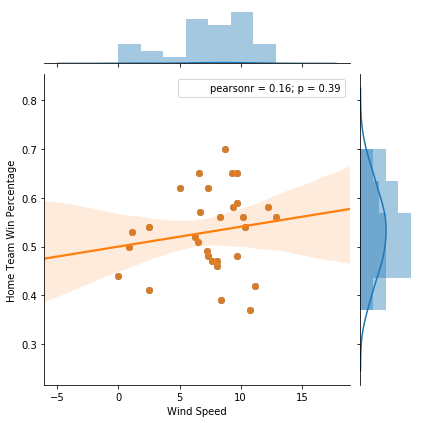

In [30]:
ax = sns.jointplot(x = 'wind_speed', 
                   y = 'home_win_percentage', 
                   data = by_venue, kind = 'scatter')
ax.set_axis_labels('Wind Speed', 'Home Team Win Percentage')
ax.plot(sns.regplot, sns.distplot);

How do home team wins and losses vary according to wind speed?

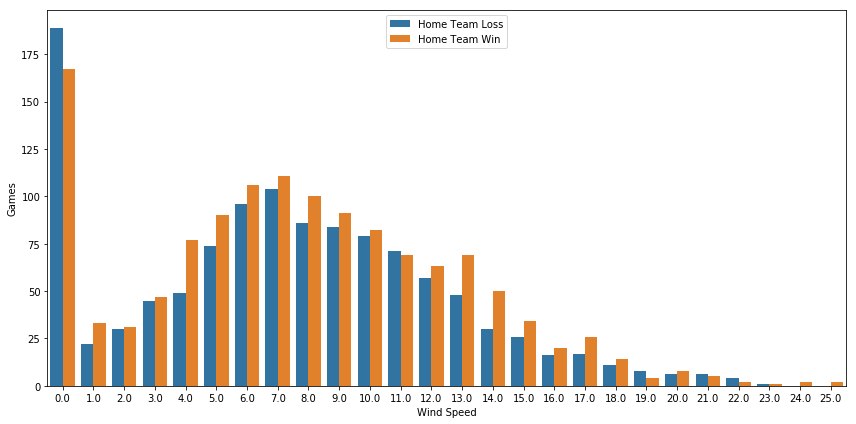

In [31]:
plt.figure(figsize = (12, 6))

ax = sns.countplot(x = df['wind_speed'], 
                   hue = df['home_team_win'], data = df)
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Games')
ax.legend(['Home Team Loss', 'Home Team Win'])

plt.tight_layout()

How does the distribution of total runs scored vary according to wind speed?

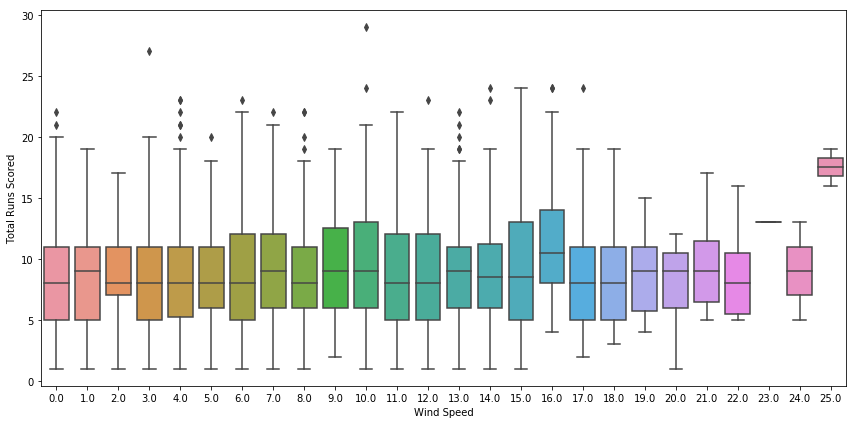

In [32]:
plt.figure(figsize = (12, 6))

ax = sns.boxplot(x = df['wind_speed'], 
                 y = df['total_runs'], 
                 data = df)
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Total Runs Scored')

plt.tight_layout()

** Attendance **

Is there a linear relationship between attendance and home win percentage?

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


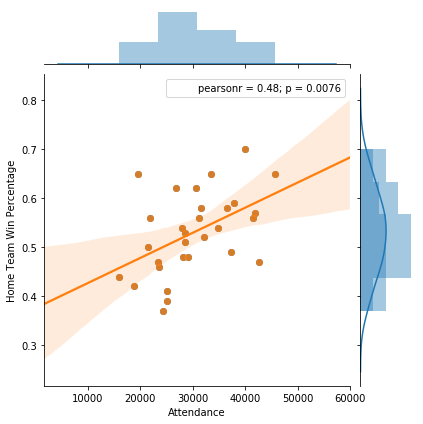

In [33]:
ax = sns.jointplot(x = 'attendance', 
                   y = 'home_win_percentage', 
                   data = by_venue, kind = 'scatter')
ax.set_axis_labels('Attendance', 'Home Team Win Percentage')
ax.plot(sns.regplot, sns.distplot);

Is there a linear relationship between attendance and home team runs when the home team wins?

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


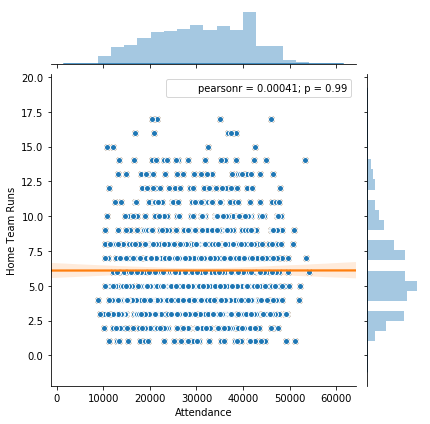

In [34]:
ax = sns.jointplot(x = df[df['home_team_win'] == 1]['attendance'], 
                   y = df[df['home_team_win'] == 1]['home_team_runs'], 
                   data = df, kind = 'scatter')
ax.set_axis_labels('Attendance', 'Home Team Runs')
ax.plot(sns.regplot, sns.distplot)
#ax.plot_joint(plt.scatter, edgecolor = "white");

Is there a linear relationship between attendance and home team runs when the home team loses?

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


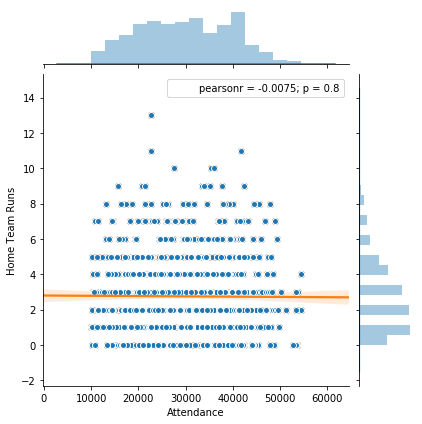

In [35]:
ax = sns.jointplot(x = df[df['home_team_win'] == 0]['attendance'], 
                   y = df[df['home_team_win'] == 0]['home_team_runs'], 
                   data = df, kind = 'scatter')
ax.set_axis_labels('Attendance', 'Home Team Runs')
ax.plot(sns.regplot, sns.distplot)
ax.plot_joint(plt.scatter, edgecolor = "white");

What is the kernal density between attendance and home team runs when the home team wins?

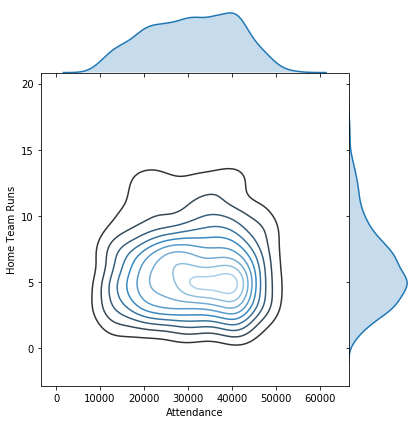

In [36]:
ax = sns.JointGrid(x = df[df['home_team_win']==1]['attendance'], 
                   y = df[df['home_team_win']==1]['home_team_runs'], 
                   data = df, space = 0)
ax.set_axis_labels('Attendance', 'Home Team Runs')
ax.plot_joint(sns.kdeplot, cmap = "Blues_d")
ax.plot_marginals(sns.kdeplot, shade = True);

What is the kernal density between attendance and home team runs when the home team loses?

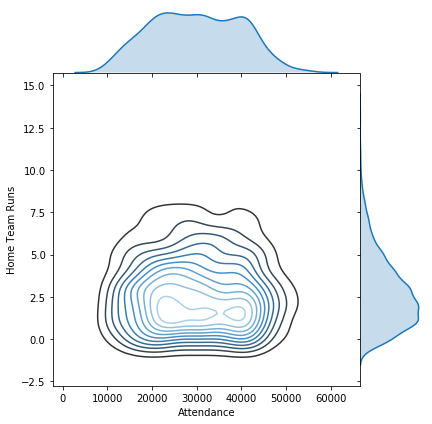

In [37]:
ax = sns.JointGrid(x = df[df['home_team_win'] == 0]['attendance'], 
                   y = df[df['home_team_win'] == 0]['home_team_runs'], 
                   data = df, space = 0)
ax.set_axis_labels('Attendance', 'Home Team Runs')
ax.plot_joint(sns.kdeplot, cmap = "Blues_d")
ax.plot_marginals(sns.kdeplot, shade = True);

Is there a linear relationship between attendance and home team runs?

How does this relationship vary depending on whether the home team wins or loses?

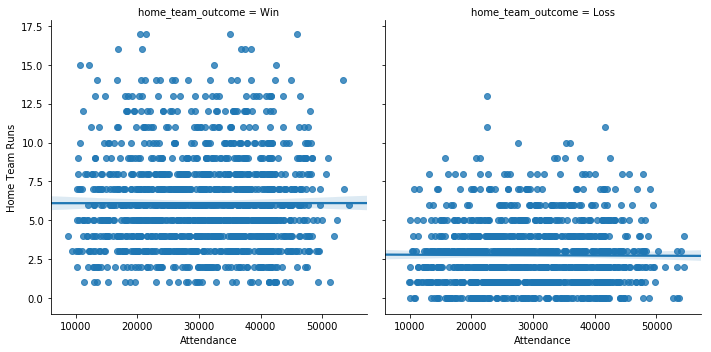

In [38]:
ax = sns.lmplot(x = 'attendance', 
                y = "home_team_runs", 
                col = "home_team_outcome", data = df)
ax.set_axis_labels('Attendance', 'Home Team Runs');

** Game Type **

How do home team wins and losses vary according to game type?

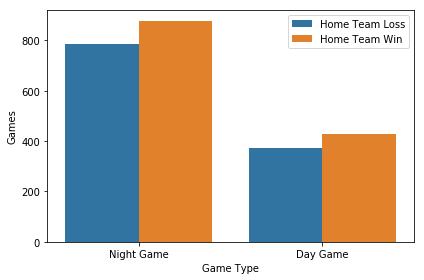

In [39]:
plt.figure(figsize = (6, 4))

ax = sns.countplot(x = df['game_type'], 
                   hue = df['home_team_win'], data = df)
ax.set_xlabel('Game Type')
ax.set_ylabel('Games')
ax.legend(['Home Team Loss', 'Home Team Win'])

plt.tight_layout()

** Field Type **

How do home team wins and losses vary according to field type?

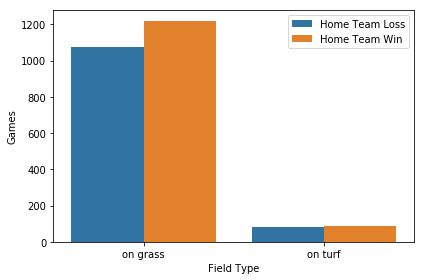

In [40]:
plt.figure(figsize = (6, 4))

ax = sns.countplot(x = df['field_type'], 
                   hue = df['home_team_win'], data = df)
ax.set_xlabel('Field Type')
ax.set_ylabel('Games')
ax.legend(['Home Team Loss', 'Home Team Win'])

plt.tight_layout()

** Temperature **

Is there a linear relationship between temperature and home team win percentage?

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


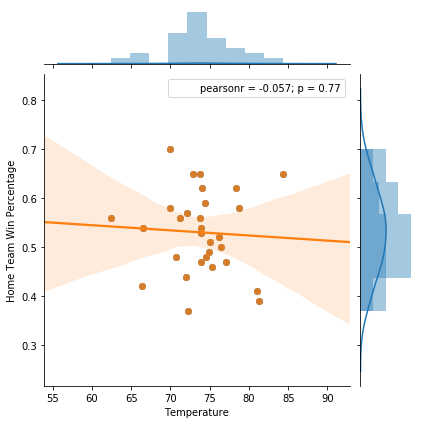

In [41]:
ax = sns.jointplot(x = 'temperature', 
                   y = 'home_win_percentage', 
                   data = by_venue, kind = 'scatter')
ax.set_axis_labels('Temperature', 'Home Team Win Percentage')
ax.plot(sns.regplot, sns.distplot);

** Game Length **

Is there a linear relationship between game length and home team win percentage?

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


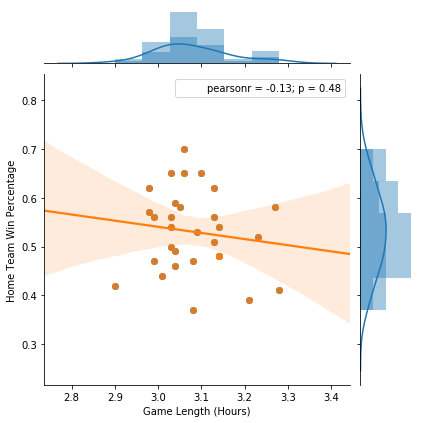

In [42]:
ax = sns.jointplot(x = 'game_hours_dec', 
                   y = 'home_win_percentage', 
                   data = by_venue, kind = 'scatter')
ax.set_axis_labels("Game Length (Hours)", 'Home Team Win Percentage')
ax.plot(sns.regplot, sns.distplot);